In [1]:
import torch
from torch.utils.data import random_split, TensorDataset
from SpectralSVR import FNN, StandardScaler, LSSVR
from matplotlib import pyplot as plt


In [2]:
x = torch.linspace(0, 100, 1000)
f = torch.stack((x**2, x**0.5 - x, x.mul(2 * torch.pi).sin()), dim=1)

n_train = int(len(x) * 0.8)
x = x.unsqueeze(1)
# random_split(TensorDataset(x, f), (0.5, 0.5))
x_train = x[:n_train]
f_train = f[:n_train]
x_test = x[n_train:]
f_test = f[n_train:]
scaler = StandardScaler().fit((x_train, f_train))
input_train, output_train = scaler.transform((x_train, f_train))
input_test, output_test = scaler.transform((x_test, f_test))


In [35]:
%timeit FNN(MAX_EPOCH=10, batch_size=16, n_hidden=2).fit(input_train, f_train)

1.17 s ± 71.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit LSSVR(c=10).fit(input_train, f_train)

15.1 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
fnn_model = FNN(MAX_EPOCH=10, batch_size=16, n_hidden=2)
fnn_model.fit(input_train, f_train)
lssvr_model = LSSVR(c=1)
lssvr_model.fit(input_train, f_train)

In [44]:
fnn_model.params

Sequential(
  (0): Sequential(
    (0): Linear(in_features=1, out_features=100, bias=True)
    (1): Softplus(beta=1.0, threshold=20.0)
  )
  (1): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Softplus(beta=1.0, threshold=20.0)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Softplus(beta=1.0, threshold=20.0)
  )
  (2): Linear(in_features=100, out_features=3, bias=True)
)

In [42]:
fnn_pred = fnn_model.predict(input_test)
lssvr_pred = lssvr_model.predict(input_test)

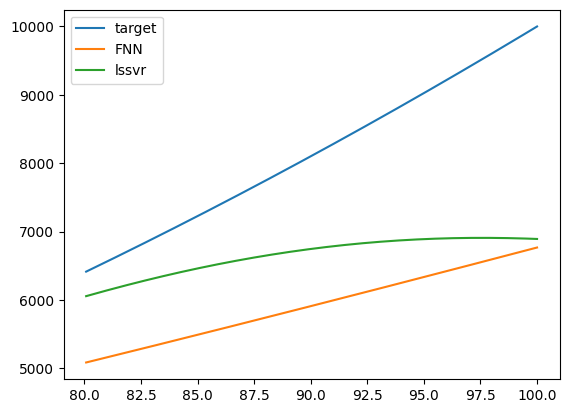

In [43]:
plt.plot(x_test, f_test[:,0])
plt.plot(x_test, fnn_pred[:,0].detach())
plt.plot(x_test, lssvr_pred[:,0].detach())
plt.legend(["target","FNN", "lssvr"])